In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.combine import SMOTEENN, SMOTETomek
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv("dataset/preprocessed.csv")
df.shape

(762106, 44)

In [2]:
df = df.drop(df[df.target == -1].index)
df.shape

(762094, 44)

In [3]:
# Separate input features and target
y = df.target

In [4]:
X = df.drop('target', axis = 1)

In [5]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)

y_test_3_class = ["Low" if x == 1 or x == 2 else "Medium" if x == 3  else 'High' for x in y_test]
y_train_3_class = ["Low" if i == 1 or i == 2 else "Medium" if i == 3  else 'High' for i in y_train]

### Train the model without re-sampling (5- classes)

In [6]:
xgboost = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [7]:
preds = xgboost.predict(X_test)

Accuracy: 	 0.6052045936469946
F1 Score: 	 0.5662138355611752
Precision:	 0.5668081397852214
Recall:   	 0.5676435854937628


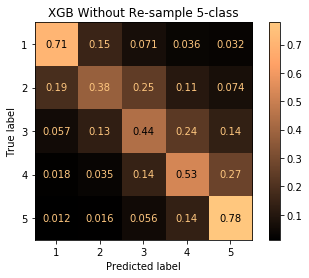

In [8]:
print("Accuracy: \t", accuracy_score(y_test, preds))
print("F1 Score: \t", f1_score(y_test, preds, average = 'macro'))
print("Precision:\t", precision_score(y_test, preds, average = 'macro'))
print("Recall:   \t", recall_score(y_test, preds, average = 'macro'))

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "XGB Without Re-sample 5-class"
disp = plot_confusion_matrix(xgboost, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

### Train the model without re-sampling (3- classes)

In [9]:
xgboost = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)

xgboost.fit(X_train, y_train_3_class)

xgboost_predictions = xgboost.predict(X_test)

In [10]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test_3_class, xgboost_predictions))
print("F1 Score: \t", f1_score(y_test_3_class, xgboost_predictions, average = 'macro'))
print("Precision:\t", precision_score(y_test_3_class, xgboost_predictions, average = 'macro'))
print("Recall:   \t", recall_score(y_test_3_class, xgboost_predictions, average = 'macro'))

Accuracy: 	 0.7676775629317042
F1 Score: 	 0.6712337767389522
Precision:	 0.6903447387889342
Recall:   	 0.6637335220328959


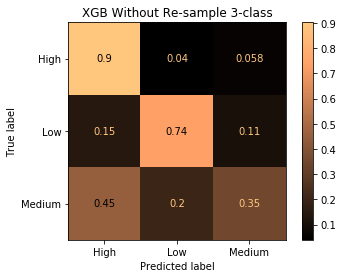

In [11]:
# Plot normalized confusion matrix

title = "XGB Without Re-sample 3-class"
disp = plot_confusion_matrix(xgboost, X_test, y_test_3_class, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()

### Train the model with re-sampling(5- classes)

In [12]:
sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)

In [13]:
xgb_sampled = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)
xgb_sampled.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [14]:
xgb_sampled_pred = xgb_sampled.predict(X_test)

Accuracy: 	 0.5774967983036258
F1 Score: 	 0.5527761972959719
Precision:	 0.5434759088167578
Recall:   	 0.572424265839463


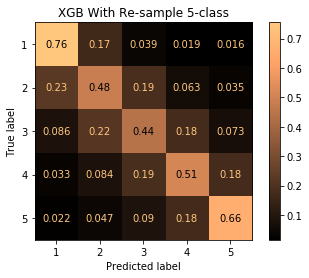

In [15]:
print("Accuracy: \t", accuracy_score(y_test, xgb_sampled_pred))
print("F1 Score: \t", f1_score(y_test, xgb_sampled_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test, xgb_sampled_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test, xgb_sampled_pred, average = 'macro'))

# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "XGB With Re-sample 5-class"
disp = plot_confusion_matrix(xgb_sampled, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

### Train the model with re-sampling(3- classes)

In [16]:
sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train_resample_3_class, y_train_resample_3_class = sm.fit_sample(X_train, y_train_3_class)

In [17]:
xgb_sampled = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 20, nthread = -1,
                          random_state = 1, verbosity = 0, gamma = 0.5)
xgb_sampled.fit(X_train_resample_3_class, y_train_resample_3_class)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [18]:
xgb_sampled_pred = xgb_sampled.predict(X_test)

Accuracy: 	 0.7257143456992295
F1 Score: 	 0.6729526581040792
Precision:	 0.663672126404015
Recall:   	 0.6961028629817041


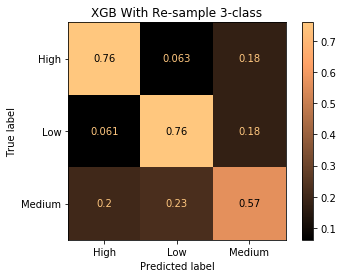

In [19]:
print("Accuracy: \t", accuracy_score(y_test_3_class, xgb_sampled_pred))
print("F1 Score: \t", f1_score(y_test_3_class, xgb_sampled_pred, average = 'macro'))
print("Precision:\t", precision_score(y_test_3_class, xgb_sampled_pred, average = 'macro'))
print("Recall:   \t", recall_score(y_test_3_class, xgb_sampled_pred, average = 'macro'))

# Plot normalized confusion matrix
title = "XGB With Re-sample 3-class"
disp = plot_confusion_matrix(xgb_sampled, X_test, y_test_3_class, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()